<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 이 노트북에서는 제공된 데이터세트에 대한 기본 정보를 살펴보겠습니다. 이 대회의 데이터세트는 시간 경과에 따른 고객 주문을 설명하는 관계형 파일 집합입니다.

 목표:
 이 대회의 목표는 사용자의 다음 주문에 포함될 제품을 예측하는 것입니다. 이 데이터세트는 익명으로 처리되었으며 20만 명 이상의 Instacart 사용자로부터 수집된 300만 건 이상의 식료품 주문 샘플을 포함하고 있습니다.

 각 사용자에 대해 4개와 100개의 주문이 제공되며 각 주문에서 구매된 제품의 순서가 함께 제공됩니다.

 필수 모듈을 가져오는 것부터 시작해 보겠습니다

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment=None

이 대회에 있는 파일을 리스트 아웃 하자

In [5]:
order_products_train_df=pd.read_csv('order_products__train.csv')
order_products_prior_df=pd.read_csv('order_products__prior.csv')
orders_df=pd.read_csv('orders.csv')
products_df=pd.read_csv('products.csv')
aisles_df=pd.read_csv('aisles.csv')
departments_df=pd.read_csv('departments.csv')

In [5]:
orders_df.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [6]:
order_products_prior_df.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [11]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


보시다시피 orders.csv파일에는 주문을 구매한 사용자, 구매 시점, 이전 주문 이후 일수 등 주어진 주문 ID에 대한 모든 정보가 있습니다.

order_porducts_train과 order_products_prior에 있는 열은 동일합니다. 그렇다면 두 파일의 차이점은 무엇일까요?

앞서 언급했듯이 이 데이터세트에는 고객의 4개에서 100개까지의 주문이 주어지고 재주문될 제품을 예측해야합니다. 따라서 사용자의 마지막 주문을 추출하여 훈련 세트와 테스트 세트로 나눕니다.고객의 모든 이전 주문 정보는 order_products_prior파일에 있습니다. 또한 oreders.csv파일에는 주어진 행이 세 가지 데이터세트(prior, train, test) 중 어느 데이터세트에 속하는지 알려주는 eval_set이라는 열이 있습니다.

order_products.csv파일에는 주어진 주문에서 구매된 제품에 대한 더 자세한 정보와 재주문 상태가 포함되어 있습니다

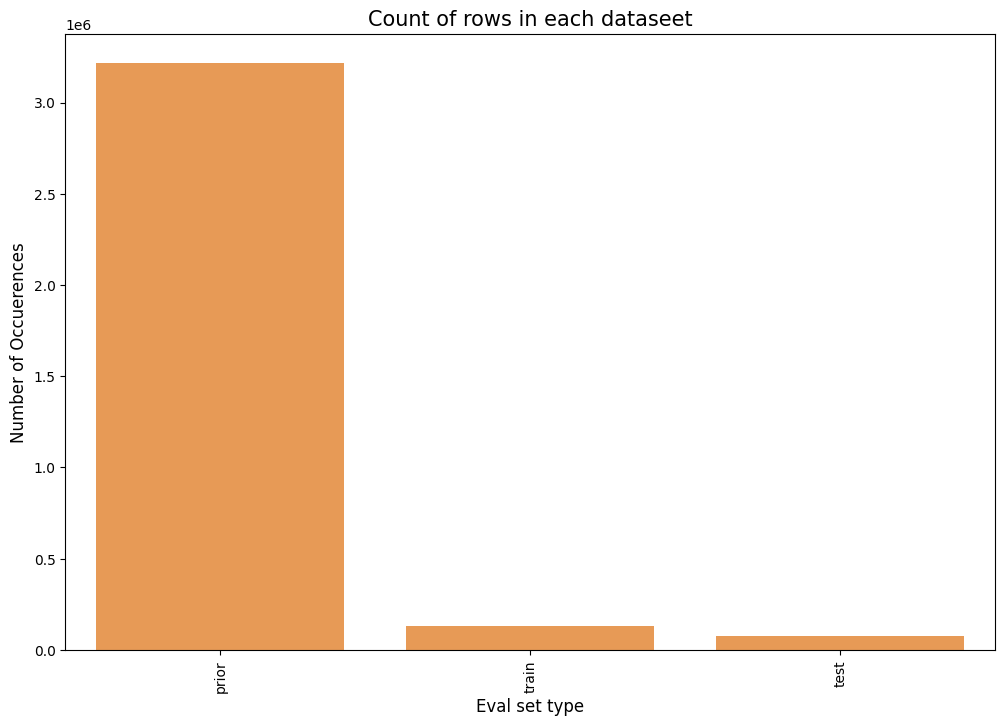

In [18]:
cnt_srs=orders_df.eval_set.value_counts()
plt. figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index,y=cnt_srs.values,alpha=0.8,color=color[1])
plt.ylabel('Number of Occuerences',fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataseet',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
def get_unique_count(x):
  return len(np.unique(x))

cnt_srs=orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,206209
test,75000
train,131209


따라서 총 206,209명의 고객이 있습니다. 그중 마지막 구매 고객 131,209명을 train세트로 제공하고 나머지 75000명의 고객을 예측해야합니다.

이제 한 고객의 주문이 4-100개까지 주어진다는 주장을 검증해보겠습니다

/tmp/ipython-input-2611705464.py:1: FutureWarning: The provided callable <function max at 0x7f560090bf60> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs=orders_df.groupby('user_id')["order_number"].aggregate(np.max).reset_index()


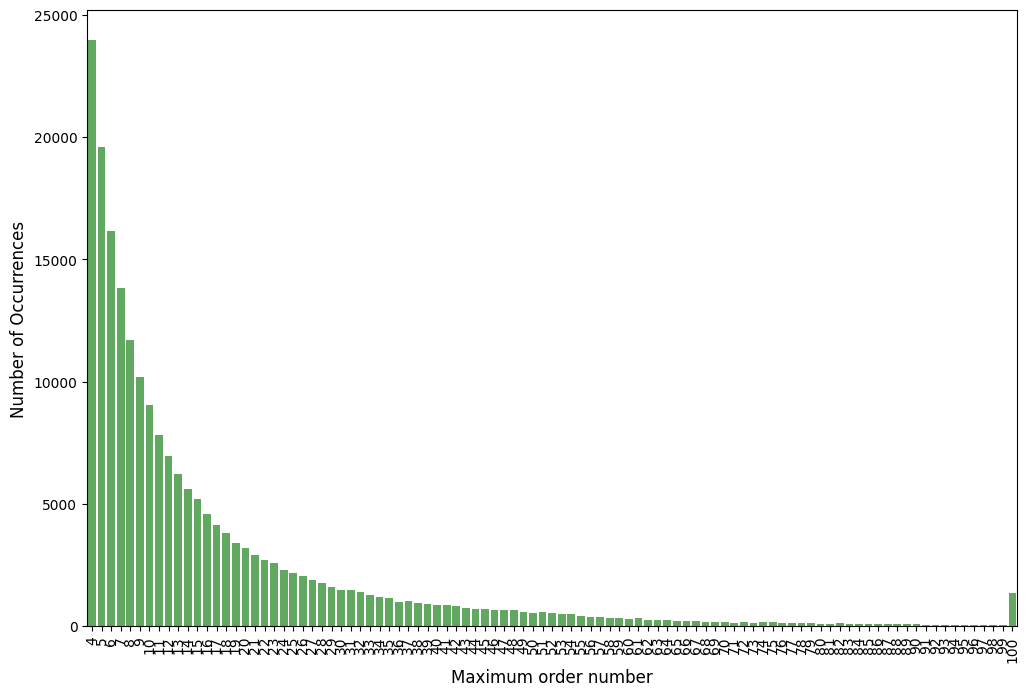

In [10]:
cnt_srs=orders_df.groupby('user_id')["order_number"].aggregate(np.max).reset_index()
cnt_srs=cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values,alpha=0.8,color=color[2])
plt.ylabel('Number of Occurrences',fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

4미만의 주문,100초과의 주문은 없다.

이제 요일에 따른 주문 습관 변화를 살펴보자

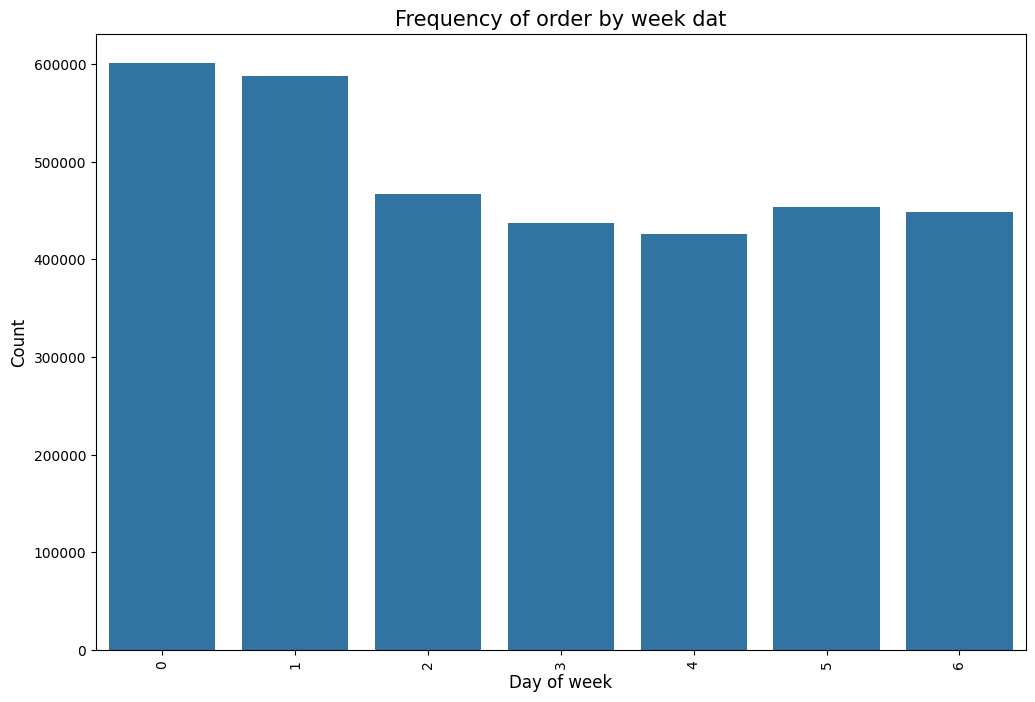

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow",data=orders_df, color=color[0])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Day of week',fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of order by week dat', fontsize=15)
plt.show()

0,1 즉 토, 일이 가장 많고 수요일이 가장 적다

이제 하루 중 주문량이 어떻게 분배되나 보자

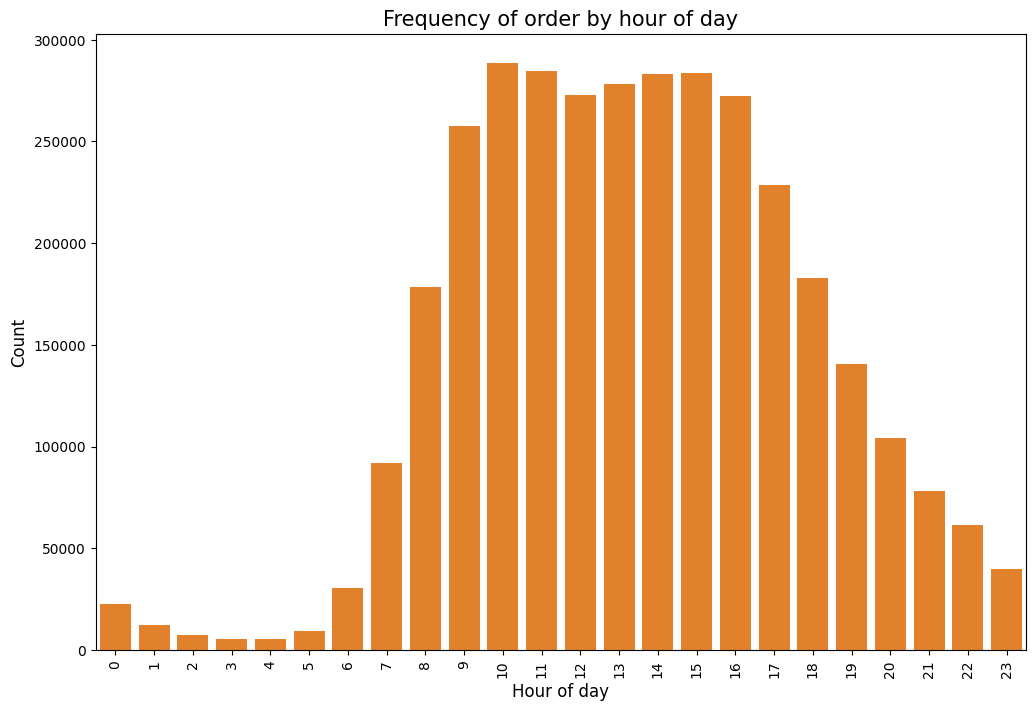

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day",data=orders_df,color=color[1])
plt.ylabel('Count',fontsize=12)
plt.xlabel('Hour of day',fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of order by hour of day',fontsize=15)
plt.show()

주로 낮시간에 주문한다.

이제 요일과 시간을 합쳐보자

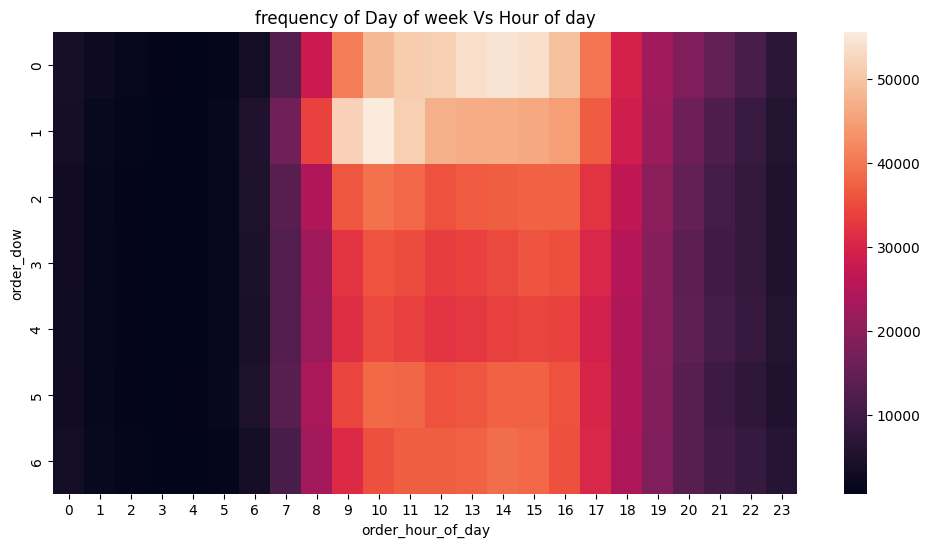

In [18]:
grouped_df=orders_df.groupby(["order_dow","order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df=grouped_df.pivot(index='order_dow',columns='order_hour_of_day',values='order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("frequency of Day of week Vs Hour of day")
plt.show()

토요일 저녁과 일요일 아침이 프라임 타임이다.

주문 간격을 체크해보자

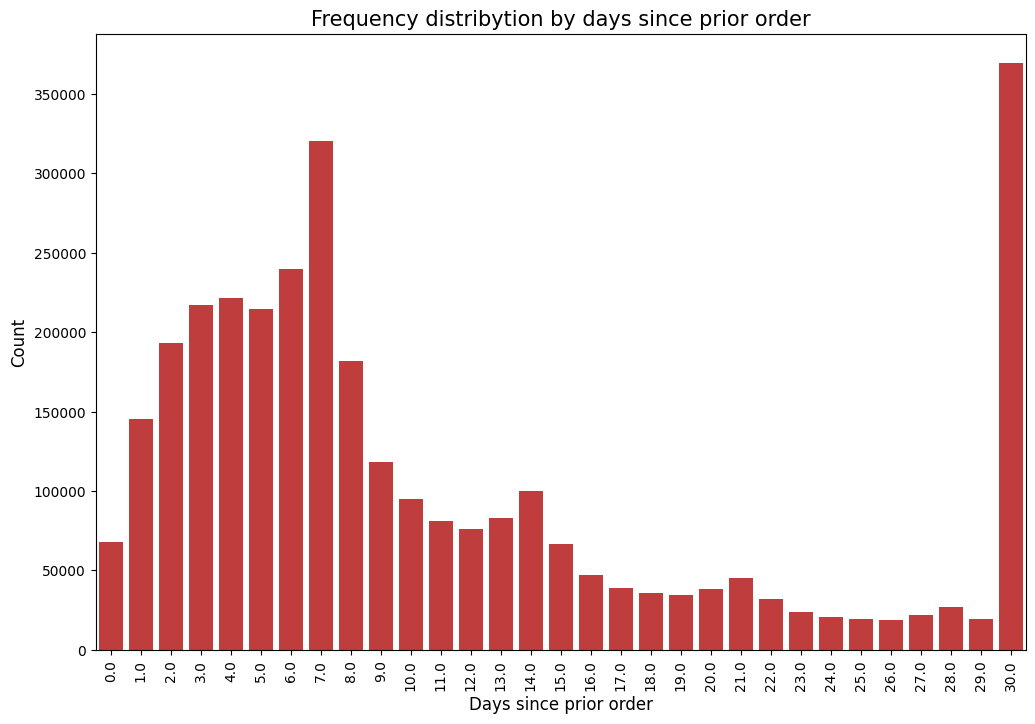

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order",data=orders_df,color=color[3])
plt.ylabel("Count",fontsize=12)
plt.xlabel('Days since prior order',fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency distribytion by days since prior order',fontsize=15)
plt.show()

소비자들이 매주 한번 시키는 것 또는 달에 한번 시키는 것으로 보인다(각각 7일 30일에 피크)
우리는 또한 14일 21일 그리고 28일에 작은 피크를 볼 수 있다(주간격)
prior, train 셋에서의 재주문 퍼센티지를 보자

In [24]:
order_products_prior_df.reordered.sum()/order_products_prior_df.shape[0]

np.float64(0.58987949853714)

In [25]:
order_products_train_df.reordered.sum()/order_products_train_df.shape[0]

np.float64(0.5985944127509629)

평균적으로 59%정도 재구매했다

어떤상품도 재구매하지 않은 경우를 체크하

In [27]:
grouped_df=order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

/tmp/ipython-input-2372244600.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1


,count
reordered,
1,0.8791
0,0.1209


In [29]:
grouped_df=order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1
grouped_df.reordered.value_counts()/grouped_df.shape[0]

/tmp/ipython-input-1993248497.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  grouped_df["reordered"].loc[grouped_df["reordered"]>1]=1


,count
reordered,
1,0.93444
0,0.06556


과거셋의 12%가 재주문이 없는데 반해 트레이닝셋의 6.5%가 재주문이 없었다

이제 각 주문별 주문 상품 수를 알아보자

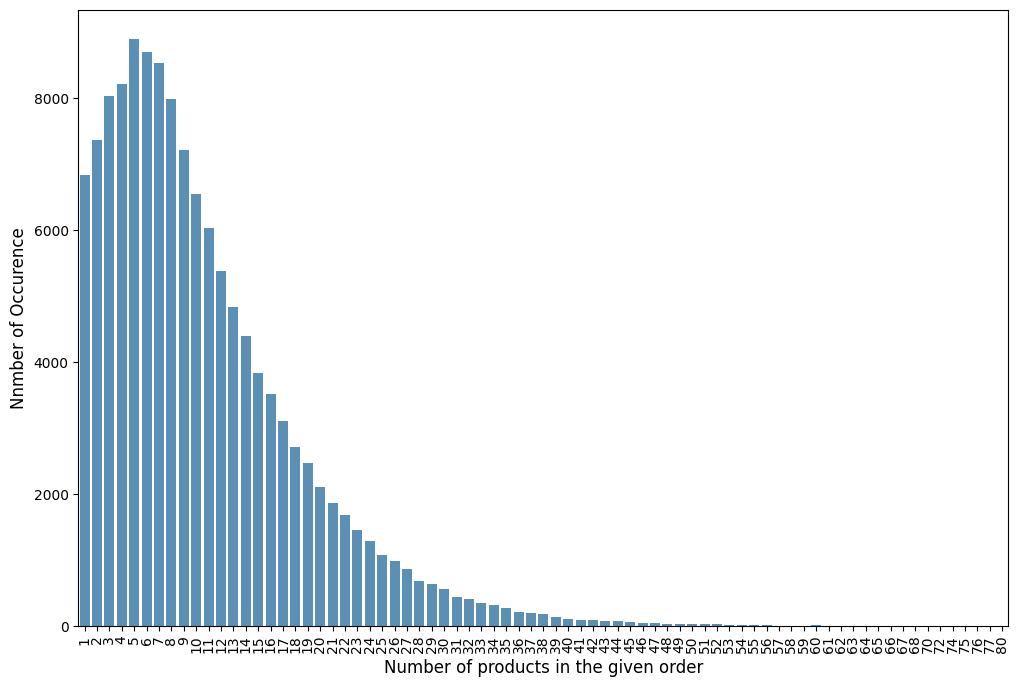

In [33]:
grouped_df=order_products_train_df.groupby('order_id')['add_to_cart_order'].aggregate('max').reset_index()
cnt_srs=grouped_df.add_to_cart_order.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index,y=cnt_srs.values,alpha=0.8)
plt.ylabel('Nnmber of Occurence',fontsize=12)
plt.xlabel('Number of products in the given order',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

right tailed 분포, 맥시멈 값은 5

상품 디테일을 보기 전에 세 파일을 보자



In [34]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [38]:
aisles_df

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [37]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


이제 이 세 상품 디테일을 order_prior 디테일과 합치자

In [39]:
order_products_prior_df=pd.merge(order_products_prior_df, products_df,on='product_id',how='left')

order_products_prior_df=pd.merge(order_products_prior_df,aisles_df,on='aisle_id',how='left')
order_products_prior_df=pd.merge(order_products_prior_df,departments_df,on='department_id',how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [40]:
cnt_srs=order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns=['product_name','frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,276990
1,Bag of Organic Bananas,221911
2,Organic Strawberries,154881
3,Organic Baby Spinach,141249
4,Organic Hass Avocado,124791
5,Organic Avocado,103103
6,Large Lemon,89145
7,Strawberries,83366
8,Limes,82205
9,Organic Whole Milk,80924


대부분이 유기농 제품이다. 또한 그들은 주로 과일이다.

이제 주요 상품 진열 구역을 알아보자

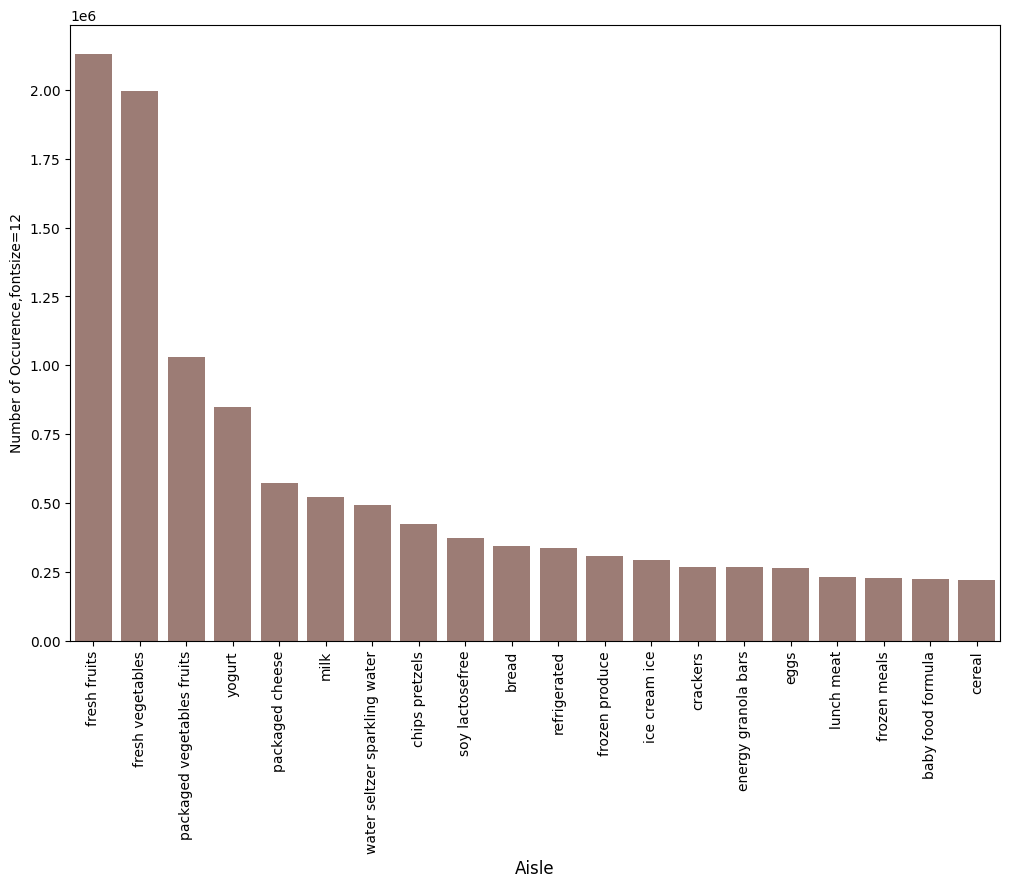

In [45]:
cnt_srs=order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index,y=cnt_srs.values,alpha=0.8,color=color[5])
plt.ylabel('Number of Occurence,fontsize=12')
plt.xlabel('Aisle',fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

상위 2개가 신선한 과일과 야채이다

이제 상품 분류 분포를 보자

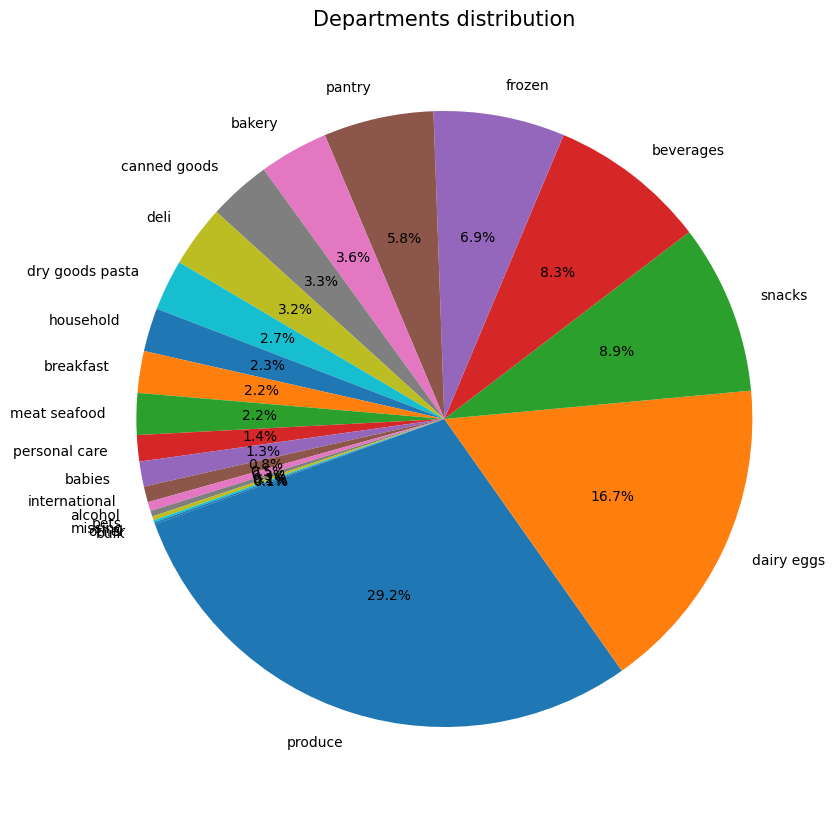

In [48]:
plt.figure(figsize=(10,10))
temp_series=order_products_prior_df['department'].value_counts()
labels=(np.array(temp_series.index))
sizes=(np.array((temp_series/temp_series.sum())*100))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=200)
plt.title('Departments distribution',fontsize=15)
plt.show()

produce가 가장 많이 주문한 분류다

이제 각 분류의 재주문 퍼센티지를 보자

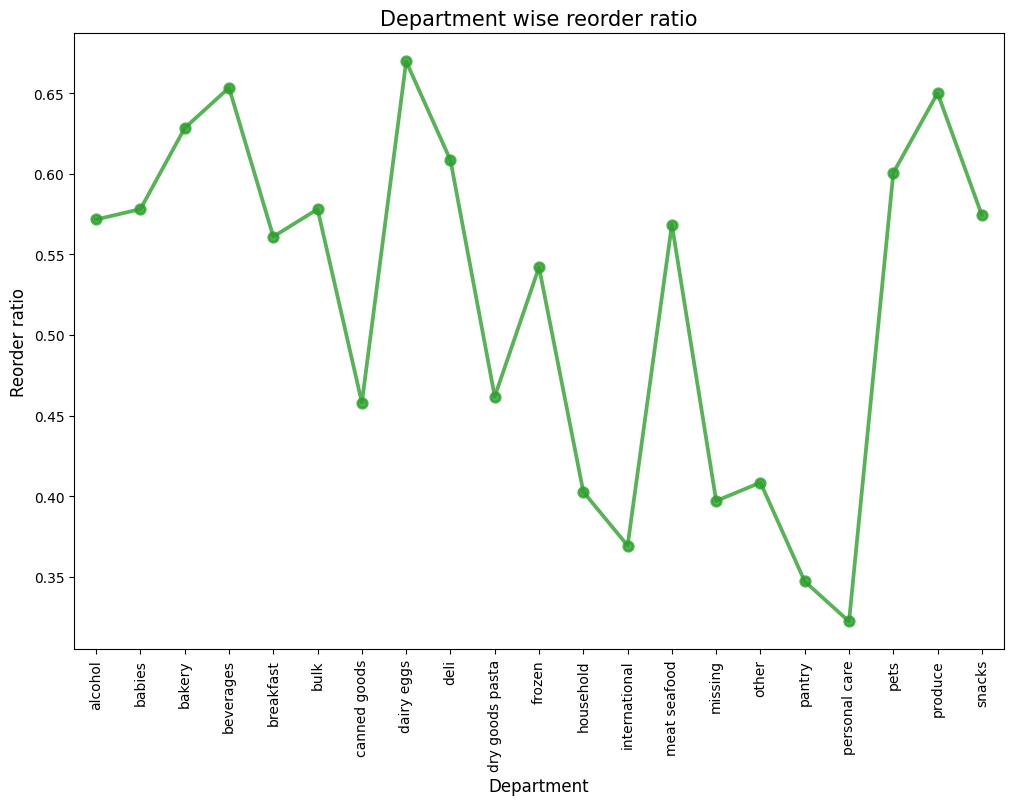

In [52]:
grouped_df=order_products_prior_df.groupby(['department'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values,y=grouped_df['reordered'].values,alpha=0.8,color=color[2])
plt.ylabel('Reorder ratio',fontsize=12)
plt.xlabel('Department',fontsize=12)
plt.title('Department wise reorder ratio',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

personal care가 가장 낮고, 달걀이 가장 높은 재주문율을 보였다

상품 통로별 재주문율을 보자

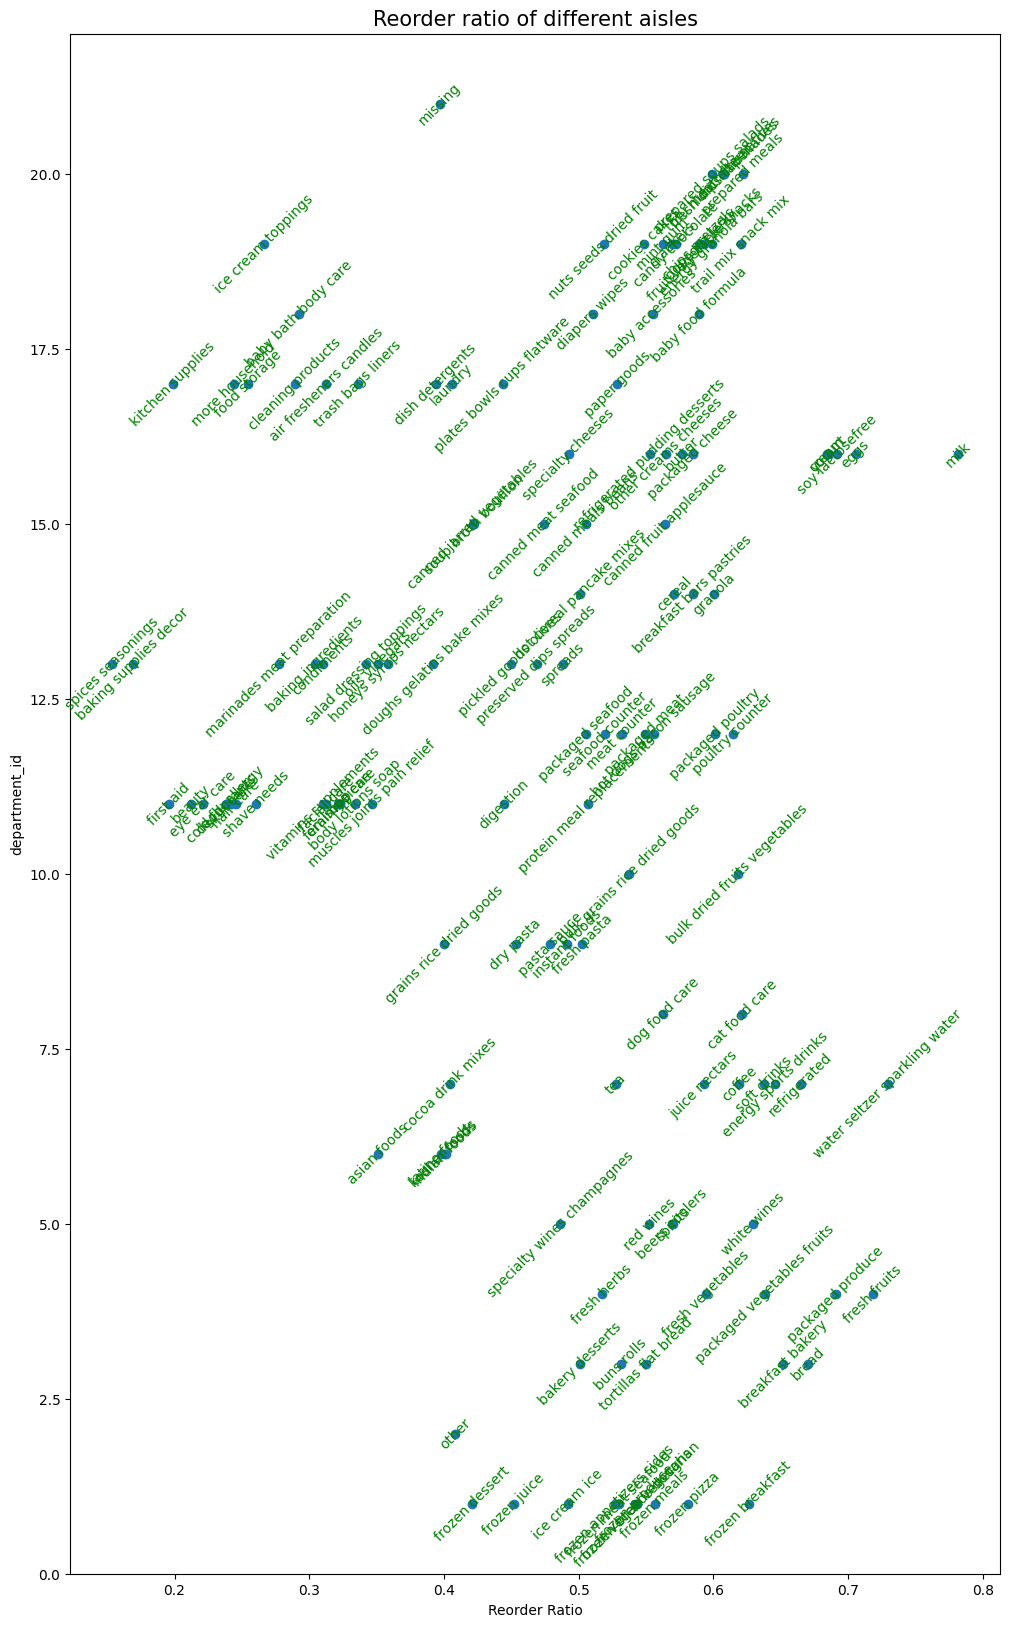

In [57]:
grouped_df=order_products_prior_df.groupby(['department_id','aisle'])['reordered'].aggregate('mean').reset_index()

fig, ax=plt.subplots(figsize=(12,20))
ax.scatter(x=grouped_df.reordered.values,y=grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
  ax.annotate(txt,(grouped_df.reordered.values[i],grouped_df.department_id.values[i]),rotation=45,ha='center',va='center',color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title('Reorder ratio of different aisles',fontsize=15)
plt.show()

상품을 카트에 담는 순서와 재주문율의 관계를 보자

/tmp/ipython-input-3569132872.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70]=70


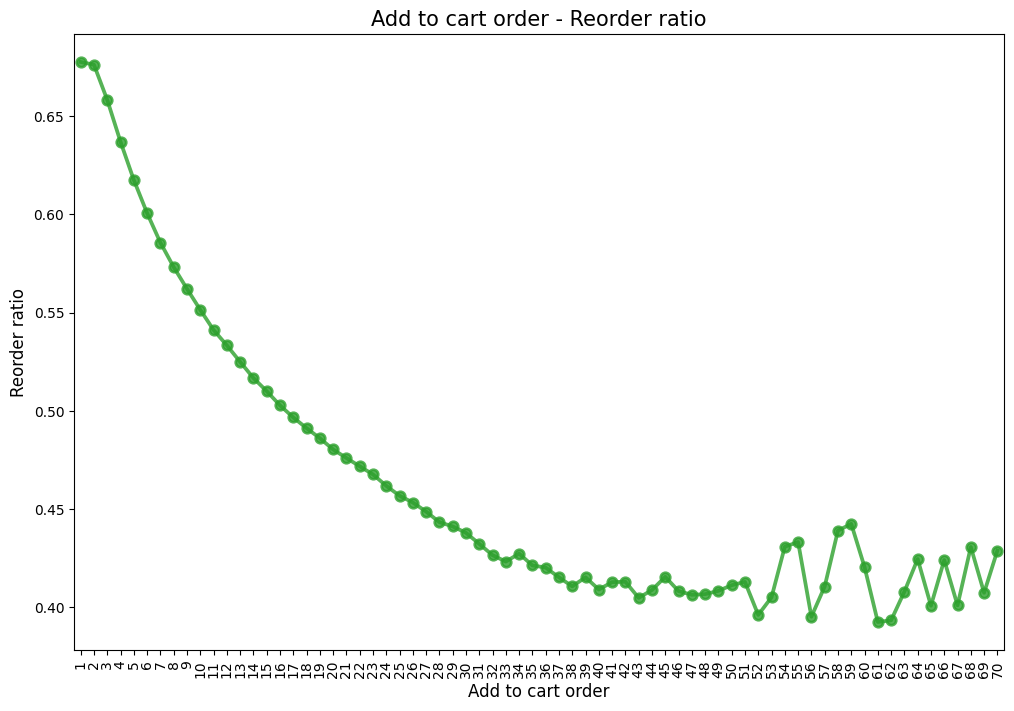

In [62]:
order_products_prior_df["add_to_cart_order_mod"]=order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df['add_to_cart_order_mod'].loc[order_products_prior_df['add_to_cart_order_mod']>70]=70
grouped_df=order_products_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['add_to_cart_order_mod'].values,y=grouped_df['reordered'].values,alpha=0.8,color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order',fontsize=12)
plt.title('Add to cart order - Reorder ratio',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

초기에 카트에 담길 수록 재주문율이 높다

시간변수에 따른 재주문율을 보자

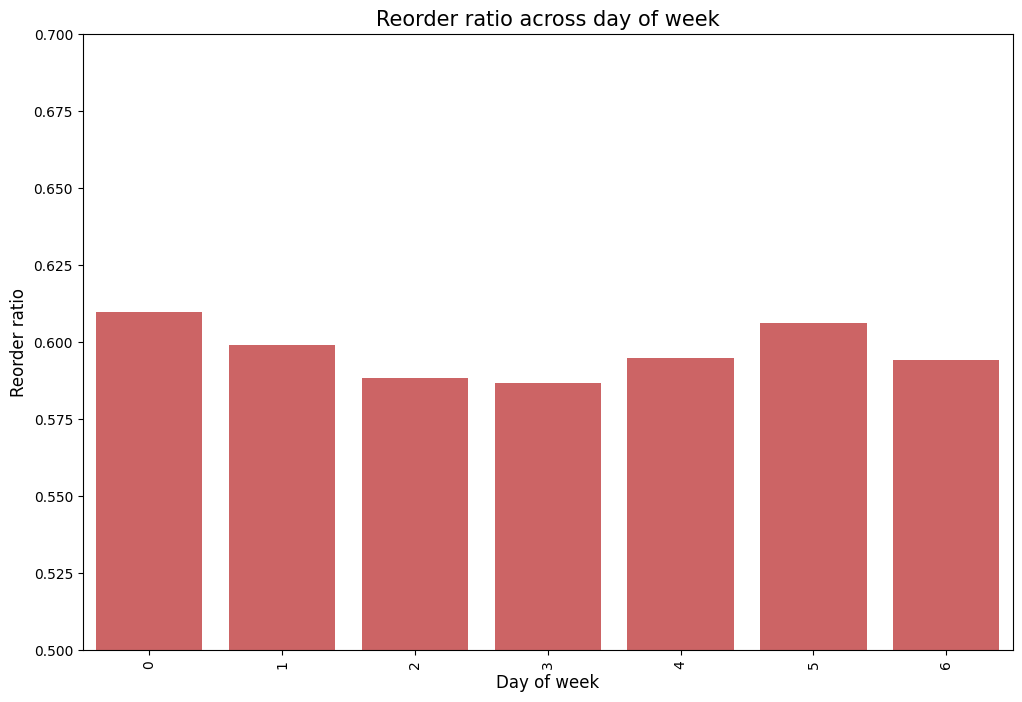

In [64]:
order_products_train_df=pd.merge(order_products_train_df, orders_df, on='order_id',how='left')
grouped_df=order_products_train_df.groupby(["order_dow"])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_dow'],y=grouped_df['reordered'],alpha=0.8,color=color[3])
plt.ylabel('Reorder ratio',fontsize=12)
plt.xlabel('Day of week',fontsize=12)
plt.title('Reorder ratio across day of week', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.7)
plt.show()

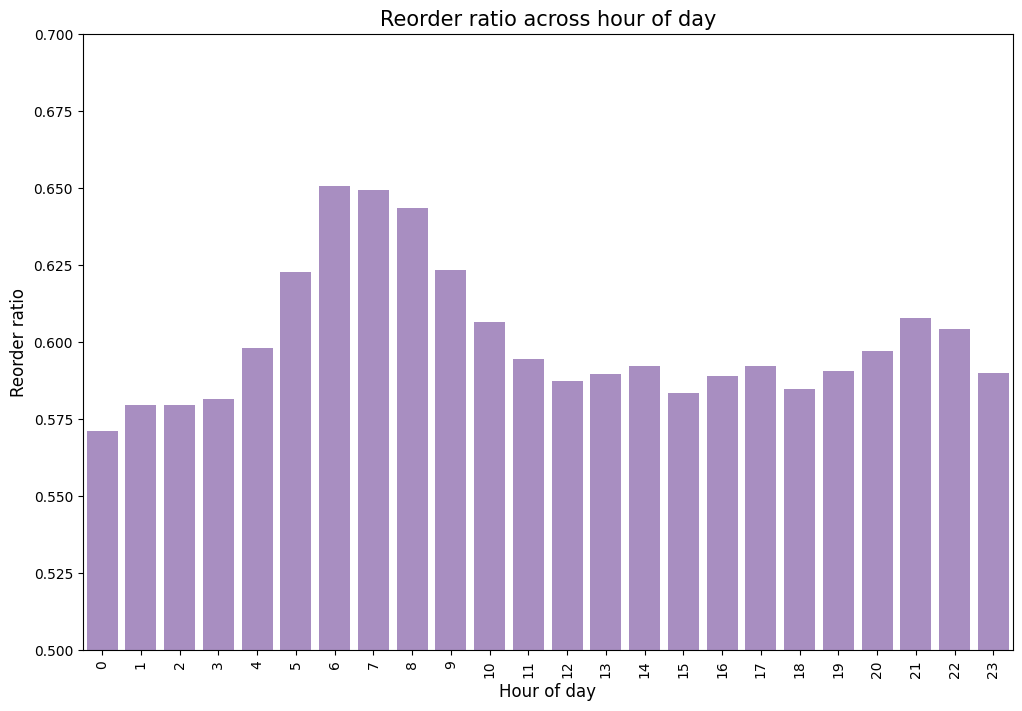

In [65]:
grouped_df=order_products_train_df.groupby(['order_hour_of_day'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_hour_of_day'].values,y=grouped_df['reordered'].values,alpha=0.8,color=color[4])
plt.ylabel('Reorder ratio',fontsize=12)
plt.xlabel('Hour of day',fontsize=12)
plt.title('Reorder ratio across hour of day',fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5,0.7)
plt.show()

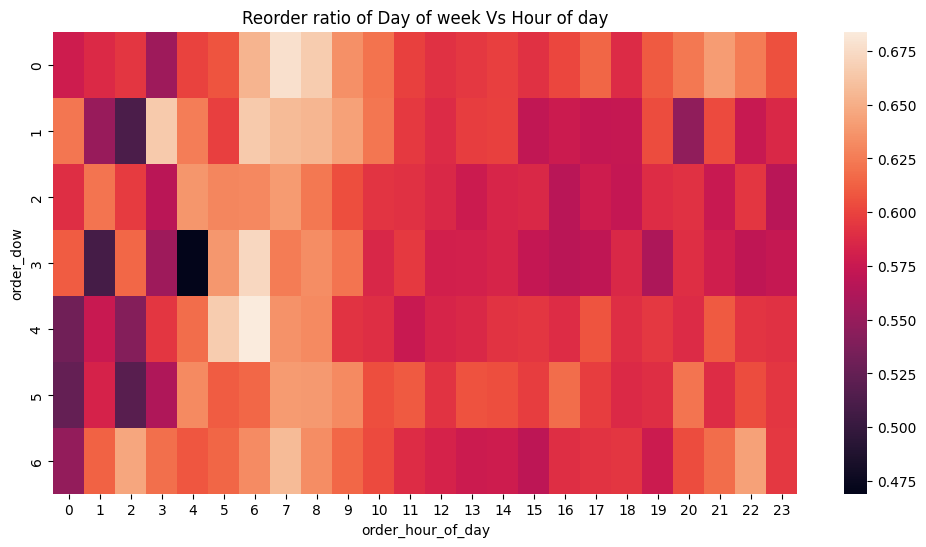

In [66]:
grouped_df=order_products_train_df.groupby(['order_dow','order_hour_of_day'])['reordered'].aggregate('mean').reset_index()
grouped_df=grouped_df.pivot(index='order_dow',columns='order_hour_of_day',values='reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title('Reorder ratio of Day of week Vs Hour of day')
plt.show()

다른 시간대보다 오전 재주문율이 높다


#새로운 시각화

In [6]:
#주말vs평일 재구매율 비교
import pandas as pd
cols_to_use = ['order_id', 'order_dow', 'order_hour_of_day']
merged_df = pd.merge(
    order_products_prior_df,
    orders_df[cols_to_use],
    on='order_id',
    how='left'
)



In [7]:
# 주말(0=Sun,6=Sat) / 평일(1~5)
merged_df['day_type'] = merged_df['order_dow'].apply(lambda x: 'Weekend' if x in [0,6] else 'Weekday')


In [8]:
daytype_reorder = merged_df.groupby('day_type')['reordered'].mean().reset_index()
daytype_reorder

,day_type,reordered
0,Weekday,0.594137
1,Weekend,0.580693


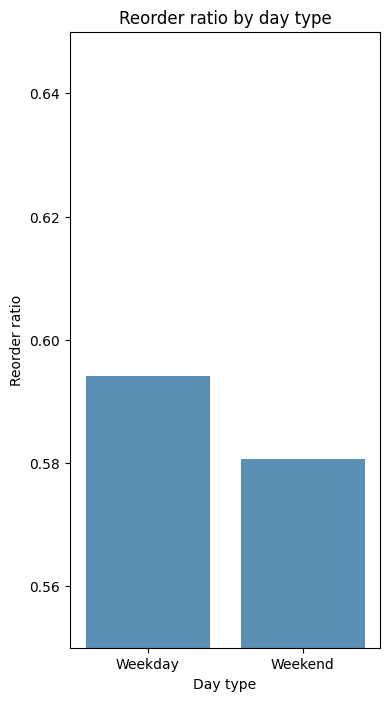

In [12]:
plt.figure(figsize=(4,8))
sns.barplot(x=daytype_reorder['day_type'],y=daytype_reorder['reordered'],alpha=0.8)
plt.xlabel('Day type')
plt.ylabel('Reorder ratio')
plt.title('Reorder ratio by day type')
plt.ylim(0.55,0.65)
plt.show()

평일의 재주문율이 높다는 사실을 알 수 있다